In [1]:
import numpy as np
import random


In [2]:
def criterio_paro(gradiente, tol):
    return np.linalg.norm(gradiente) < tol


### Método 1: Descenso de Gradiente Naïve con Dirección Aleatoria

In [3]:
def descenso_gradiente_naive_aleatorio(f, df, x0, alpha, maxIter, tol):
    xk = x0
    iteraciones = [x0]
    valores_f = [f(x0)]
    errores = []
    
    for k in range(maxIter):
        # Dirección de descenso aleatoria
        direccion = np.random.randn(*xk.shape)
        direccion /= np.linalg.norm(direccion)  # Normalizamos
        
        xk = xk - alpha * direccion
        iteraciones.append(xk)
        valores_f.append(f(xk))
        
        # Error basado en el criterio de paro (norma del gradiente)
        gradiente = df(xk)
        error = np.linalg.norm(gradiente)
        errores.append(error)
        
        if criterio_paro(gradiente, tol):
            return xk, iteraciones, valores_f, errores, k+1, True
    
    return xk, iteraciones, valores_f, errores, maxIter, False


### Método 2: Descenso Máximo Naïve

In [4]:
def descenso_maximo_naive(f, df, x0, alpha, maxIter, tol):
    xk = x0
    iteraciones = [x0]
    valores_f = [f(x0)]
    errores = []
    
    for k in range(maxIter):
        # Direccion de máximo descenso es el negativo del gradiente
        direccion = -df(xk)
        
        xk = xk - alpha * direccion
        iteraciones.append(xk)
        valores_f.append(f(xk))
        
        # Error basado en el criterio de paro (norma del gradiente)
        gradiente = df(xk)
        error = np.linalg.norm(gradiente)
        errores.append(error)
        
        if criterio_paro(gradiente, tol):
            return xk, iteraciones, valores_f, errores, k+1, True
    
    return xk, iteraciones, valores_f, errores, maxIter, False


### Método 3: Descenso de Gradiente de Newton (con Hessiano Aproximado)

In [5]:
def descenso_newton_aproximado(f, df, x0, alpha, maxIter, tol):
    xk = x0
    iteraciones = [x0]
    valores_f = [f(x0)]
    errores = []
    
    # Inicialización de una matriz identidad como aproximación inicial del Hessiano
    Hk = np.eye(len(x0))
    
    for k in range(maxIter):
        gradiente = df(xk)
        direccion = -np.dot(Hk, gradiente)  # Direccion del descenso de Newton aproximado
        
        xk_new = xk + alpha * direccion
        
        sk = xk_new - xk
        yk = df(xk_new) - gradiente
        
        xk = xk_new
        iteraciones.append(xk)
        valores_f.append(f(xk))
        
        # Actualización del Hessiano utilizando la fórmula de BFGS
        rho_k = 1.0 / np.dot(yk.T, sk)
        Hk = (np.eye(len(xk)) - rho_k * np.outer(sk, yk)).dot(Hk).dot(np.eye(len(xk)) - rho_k * np.outer(yk, sk)) + rho_k * np.outer(sk, sk)
        
        # Error basado en el criterio de paro
        error = np.linalg.norm(gradiente)
        errores.append(error)
        
        if criterio_paro(gradiente, tol):
            return xk, iteraciones, valores_f, errores, k+1, True
    
    return xk, iteraciones, valores_f, errores, maxIter, False


### Método 4: Descenso de Gradiente de Newton (con Hessiano Exacto)

In [6]:
def descenso_newton_exacto(f, df, ddf, x0, alpha, maxIter, tol):
    xk = x0
    iteraciones = [x0]
    valores_f = [f(x0)]
    errores = []
    
    for k in range(maxIter):
        gradiente = df(xk)
        Hessiano = ddf(xk)
        
        direccion = -np.linalg.solve(Hessiano, gradiente)  # Direccion de Newton exacta
        
        xk = xk + alpha * direccion
        iteraciones.append(xk)
        valores_f.append(f(xk))
        
        # Error basado en el criterio de paro
        error = np.linalg.norm(gradiente)
        errores.append(error)
        
        if criterio_paro(gradiente, tol):
            return xk, iteraciones, valores_f, errores, k+1, True
    
    return xk, iteraciones, valores_f, errores, maxIter, False


In [7]:
def f(x):
    return x[0]**2 + x[1]**2

def df(x):
    return np.array([2*x[0], 2*x[1]])

def ddf(x):
    return np.array([[2, 0], [0, 2]])

# Punto inicial
x0 = np.array([2.0, 3.0])

# Parámetros
alpha = 0.1
maxIter = 100
tol = 1e-6

# Ejecutamos los métodos
resultado_naive_aleatorio = descenso_gradiente_naive_aleatorio(f, df, x0, alpha, maxIter, tol)
resultado_maximo_naive = descenso_maximo_naive(f, df, x0, alpha, maxIter, tol)
resultado_newton_aproximado = descenso_newton_aproximado(f, df, x0, alpha, maxIter, tol)
resultado_newton_exacto = descenso_newton_exacto(f, df, ddf, x0, alpha, maxIter, tol)


In [15]:
import matplotlib.pyplot as plt

def mostrar_resultados(nombre_metodo, x_final, iteraciones, valores_f, errores, num_iter, convergencia):
    print(f"--- {nombre_metodo} ---")
    print(f"Última solución encontrada (x): {x_final}")
    print(f"Número de iteraciones: {num_iter}")
    print(f"Convergencia: {'Sí' if convergencia else 'No'}")
    print(f"Valores de la función objetivo f(x) en cada iteración:")
    for i, valor in enumerate(valores_f):
        print(f"Iteración {i}: f(x) = {valor}")
    
    print(f"\nErrores (norma del gradiente) en cada iteración:")
    for i, error in enumerate(errores):
        print(f"Iteración {i}: Error = {error}")
    
    # Graficar valores de la función objetivo y errores
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    
    # Gráfico de f(x) vs iteraciones
    ax[0].plot(range(num_iter+1), valores_f, marker='o', label='f(x)')
    ax[0].set_title(f'{nombre_metodo}: f(x) vs Iteraciones')
    ax[0].set_xlabel('Iteración')
    ax[0].set_ylabel('f(x)')
    ax[0].grid(True)
    ax[0].legend()

    # Gráfico de errores vs iteraciones
    ax[1].plot(range(num_iter), errores, marker='o', color='r', label='Error')
    ax[1].set_title(f'{nombre_metodo}: Error vs Iteraciones')
    ax[1].set_xlabel('Iteración')
    ax[1].set_ylabel('Error')
    ax[1].grid(True)
    ax[1].legend()

    plt.tight_layout()
    plt.show()


# Mostrar resultados

--- Descenso Gradiente Naïve con Dirección Aleatoria ---
Última solución encontrada (x): [1.93409735 3.16740952]
Número de iteraciones: 100
Convergencia: No
Valores de la función objetivo f(x) en cada iteración:
Iteración 0: f(x) = 13.0
Iteración 1: f(x) = 12.484508665701952
Iteración 2: f(x) = 13.143395386862277
Iteración 3: f(x) = 12.462498582478549
Iteración 4: f(x) = 11.943665146249213
Iteración 5: f(x) = 12.592912744620374
Iteración 6: f(x) = 12.249032263144711
Iteración 7: f(x) = 12.584319126331764
Iteración 8: f(x) = 12.723206885984116
Iteración 9: f(x) = 12.861266224361206
Iteración 10: f(x) = 12.771998029400063
Iteración 11: f(x) = 13.018906354006667
Iteración 12: f(x) = 12.98007134806932
Iteración 13: f(x) = 12.270622108908952
Iteración 14: f(x) = 11.904472405635524
Iteración 15: f(x) = 12.593652101673445
Iteración 16: f(x) = 12.546213504680008
Iteración 17: f(x) = 12.951950587170813
Iteración 18: f(x) = 12.32041848564905
Iteración 19: f(x) = 11.740639669248049
Iteración 20: 

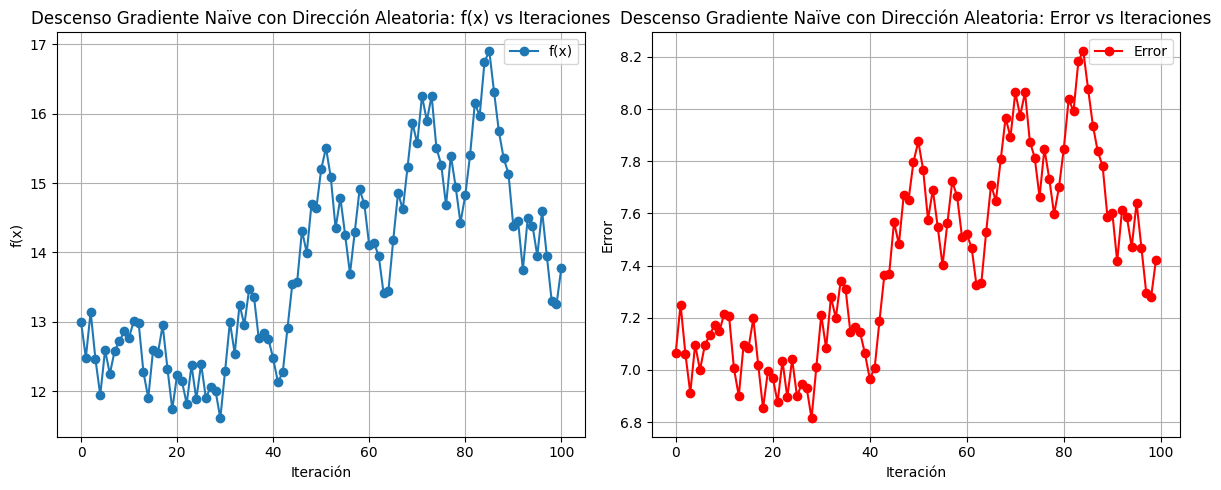

In [18]:

mostrar_resultados("Descenso Gradiente Naïve con Dirección Aleatoria", *resultado_naive_aleatorio)

--- Descenso Máximo Naïve ---
Última solución encontrada (x): [1.65635949e+08 2.48453924e+08]
Número de iteraciones: 100
Convergencia: No
Valores de la función objetivo f(x) en cada iteración:
Iteración 0: f(x) = 13.0
Iteración 1: f(x) = 18.72
Iteración 2: f(x) = 26.9568
Iteración 3: f(x) = 38.817792
Iteración 4: f(x) = 55.89762048000001
Iteración 5: f(x) = 80.4925734912
Iteración 6: f(x) = 115.90930582732801
Iteración 7: f(x) = 166.90940039135234
Iteración 8: f(x) = 240.34953656354736
Iteración 9: f(x) = 346.10333265150825
Iteración 10: f(x) = 498.38879901817177
Iteración 11: f(x) = 717.6798705861673
Iteración 12: f(x) = 1033.459013644081
Iteración 13: f(x) = 1488.1809796474768
Iteración 14: f(x) = 2142.9806106923666
Iteración 15: f(x) = 3085.892079397008
Iteración 16: f(x) = 4443.684594331691
Iteración 17: f(x) = 6398.905815837636
Iteración 18: f(x) = 9214.424374806196
Iteración 19: f(x) = 13268.77109972092
Iteración 20: f(x) = 19107.030383598125
Iteración 21: f(x) = 27514.1237523812

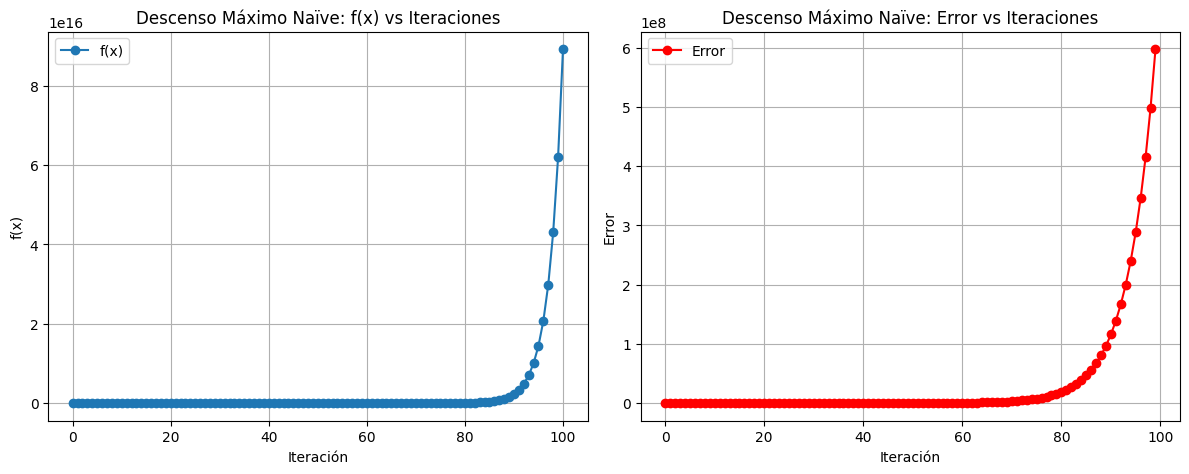

In [19]:
mostrar_resultados("Descenso Máximo Naïve", *resultado_maximo_naive)

--- Descenso Gradiente de Newton Aproximado ---
Última solución encontrada (x): [4.72202647e-05 7.08303970e-05]
Número de iteraciones: 100
Convergencia: No
Valores de la función objetivo f(x) en cada iteración:
Iteración 0: f(x) = 13.0
Iteración 1: f(x) = 8.32
Iteración 2: f(x) = 6.7392
Iteración 3: f(x) = 5.4587520000000005
Iteración 4: f(x) = 4.42158912
Iteración 5: f(x) = 3.5814871872
Iteración 6: f(x) = 2.9010046216319996
Iteración 7: f(x) = 2.3498137435219197
Iteración 8: f(x) = 1.903349132252755
Iteración 9: f(x) = 1.5417127971247315
Iteración 10: f(x) = 1.2487873656710327
Iteración 11: f(x) = 1.0115177661935362
Iteración 12: f(x) = 0.8193293906167645
Iteración 13: f(x) = 0.6636568063995791
Iteración 14: f(x) = 0.5375620131836591
Iteración 15: f(x) = 0.4354252306787639
Iteración 16: f(x) = 0.35269443684979873
Iteración 17: f(x) = 0.28568249384833694
Iteración 18: f(x) = 0.23140282001715293
Iteración 19: f(x) = 0.18743628421389386
Iteración 20: f(x) = 0.15182339021325406
Iteración

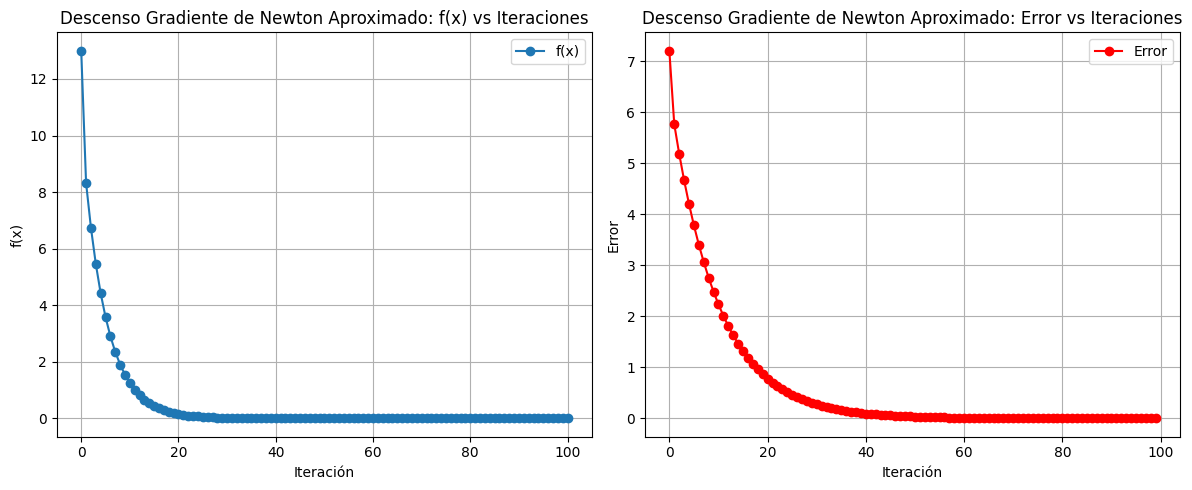

In [20]:
mostrar_resultados("Descenso Gradiente de Newton Aproximado", *resultado_newton_aproximado)

--- Descenso Gradiente de Newton Exacto ---
Última solución encontrada (x): [5.31227978e-05 7.96841967e-05]
Número de iteraciones: 100
Convergencia: No
Valores de la función objetivo f(x) en cada iteración:
Iteración 0: f(x) = 13.0
Iteración 1: f(x) = 10.530000000000001
Iteración 2: f(x) = 8.529300000000001
Iteración 3: f(x) = 6.908733000000002
Iteración 4: f(x) = 5.596073730000001
Iteración 5: f(x) = 4.532819721300001
Iteración 6: f(x) = 3.671583974253001
Iteración 7: f(x) = 2.9739830191449306
Iteración 8: f(x) = 2.4089262455073936
Iteración 9: f(x) = 1.9512302588609889
Iteración 10: f(x) = 1.5804965096774009
Iteración 11: f(x) = 1.2802021728386948
Iteración 12: f(x) = 1.0369637599993429
Iteración 13: f(x) = 0.8399406455994678
Iteración 14: f(x) = 0.6803519229355689
Iteración 15: f(x) = 0.5510850575778108
Iteración 16: f(x) = 0.4463788966380267
Iteración 17: f(x) = 0.3615669062768017
Iteración 18: f(x) = 0.2928691940842094
Iteración 19: f(x) = 0.23722404720820958
Iteración 20: f(x) = 

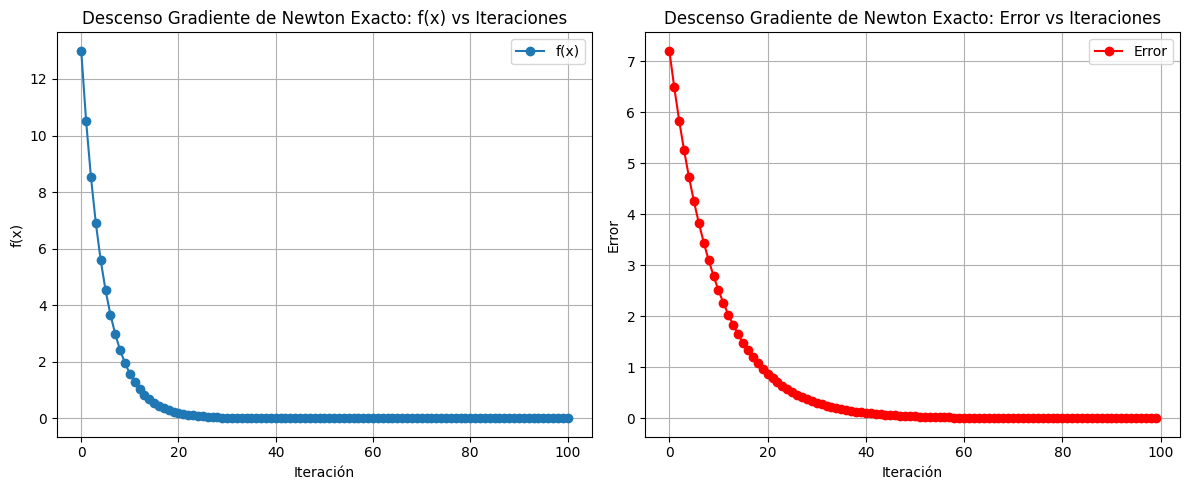

In [21]:
mostrar_resultados("Descenso Gradiente de Newton Exacto", *resultado_newton_exacto)